In [1]:
import pandas as pd
import sqlite3

In [2]:
triplet_dataset = pd.read_csv('C:/Users/User/Desktop/Music project/train_triplets/train_triplets.txt',
nrows=10000,sep='\t', header=None, names=['user','song','play_count'])

In [3]:
song_count = triplet_dataset["song"].nunique() 
user_count=triplet_dataset["user"].nunique()
print(user_count)
u=triplet_dataset['user']
print(u)
print(len(u))

#output_list_song = [{'user':k,'song_count':v} for k,v in output_dict.items()]
#    play_count_df = pd.DataFrame(output_list)
#    play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)
#    play_count_df.to_csv('user_playcount_df.csv', index = False)

173
0       b80344d063b5ccb3212f76538f3d9e43d87dca9e
1       b80344d063b5ccb3212f76538f3d9e43d87dca9e
2       b80344d063b5ccb3212f76538f3d9e43d87dca9e
3       b80344d063b5ccb3212f76538f3d9e43d87dca9e
4       b80344d063b5ccb3212f76538f3d9e43d87dca9e
                          ...                   
9995    8caf9a87e266a22298bd977a63489d008af241c5
9996    8caf9a87e266a22298bd977a63489d008af241c5
9997    8caf9a87e266a22298bd977a63489d008af241c5
9998    8caf9a87e266a22298bd977a63489d008af241c5
9999    8caf9a87e266a22298bd977a63489d008af241c5
Name: user, Length: 10000, dtype: object
10000


In [4]:
output_dict = {}
with open('C:/Users/User/Desktop/Music project/train_triplets/train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
    output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
    play_count_df = pd.DataFrame(output_list)
    play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)
    play_count_df.to_csv('user_playcount_df.csv', index = False)

In [5]:
output_dict_new = {}
with open('C:/Users/User/Desktop/Music project/train_triplets/train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict_new:
            play_count +=output_dict_new[song]
            output_dict_new.update({song:play_count})
        output_dict_new.update({song:play_count})
    output_list = [{'song':k,'play_count':v} for k,v in output_dict_new.items()]
    song_count_df = pd.DataFrame(output_list)
    song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)
    song_count_df.to_csv('song_playcount_df.csv', index = False)

In [6]:
song_count_df

,song,play_count
202,SOBONKR12A58A7A7E0,726885
199,SOAUWYT12A81C206F1,648239
218,SOSXLTC12AF72A7F54,527893
22,SOFRQTD12A81C233C0,425463
206,SOEGIYH12A6D4FC0E3,389880
...,...,...
326175,SOXZARS12AB01851EE,1
326176,SOCCQEA12AB017E7CF,1
272569,SOGNHOL12A8C13C379,1
361600,SOPXELI12A8C13FAB0,1


In [7]:
total_play_count = sum(song_count_df.play_count)
(float(play_count_df.head(n=100000).play_count.sum())/total_play_count)*100


40.8807280500655

In [8]:
play_count_subset = play_count_df.head(n=100000)

In [9]:
(float(song_count_df.head(n=30000).play_count.sum())/total_play_count)*100


78.39315366645269

In [10]:
song_count_subset = song_count_df.head(n=30000)

In [11]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [12]:
triplet_dataset =pd.read_csv('C:/Users/User/Desktop/Music project/train_triplets/train_triplets.txt',sep='\t', header=None,
                             names=['user','song','play_count'])
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset) ]
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [13]:
triplet_dataset_sub_song.to_csv('triplet_dataset_sub_song.csv', index=False)


In [14]:
connect_sql = sqlite3.connect('C:/Users/User/Desktop/Music project/track_metadata.db')
cur = connect_sql.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()


[('songs',)]

In [15]:
track_metadata_df = pd.read_sql(con=connect_sql, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]

In [16]:
track_metadata_df_sub

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
145,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
172,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
191,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999858,TRYYXRZ128F9331D61,The Outer Banks,SOBPQCK12AF72A2FD5,In A Safe Place,ARVIZ6L1187FB509A5,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,The Album Leaf,262.29506,0.763232,0.507750,2004,5609655,-1,0
999914,TRYYKXQ128F42883F2,Debajo del mar,SOHGIKE12A8C139B56,Café Tacvba,ARDJBYY12086C12CD1,,Café Tacvba,180.08771,0.734064,0.531663,1992,1074120,-1,0
999917,TRYYKKO128F4263A84,Message In A Bottle,SOSEOBD12A8C131E02,Any Given Thursday,ARZENOX1187B98A645,8a81edd9-6f62-4ac7-afee-17dc0fec5fe7,John Mayer,306.83383,0.837948,0.787679,0,3153098,11132,5342
999972,TRYYYJZ128F424BFA1,Deliverance,SOJYTFC12A6D4FD812,Rock Love,ARNLVQB1187B9AEAB0,e57f0cac-4f56-473c-8d7e-d93f753fd586,Steve Miller Band,561.18812,0.771815,0.547589,1971,3037984,-1,0


In [17]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])

track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, 
                                           how='left', left_on='song', right_on='song_id')

triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)


del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [18]:
triplet_dataset_sub_song_merged

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
...,...,...,...,...,...,...,...
10774553,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOFVUHW12A8C133115,1,Hanging High,Youth Novels,Lykke Li,2008
10774554,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOKTYPK12A8C13AD20,10,Miss Take (Album Version),Hell Yeah,HorrorPops,0
10774555,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOTJPUL12A8C133126,1,Window Blues,Youth Novels,Lykke Li,2008
10774556,ca99d94daa9d5231643a08aac2f3bfb645e73b09,SOUEAAS12A8C133106,2,Let It Fall,Youth Novels,Lykke Li,2008


## VISUAL ANALYSIS

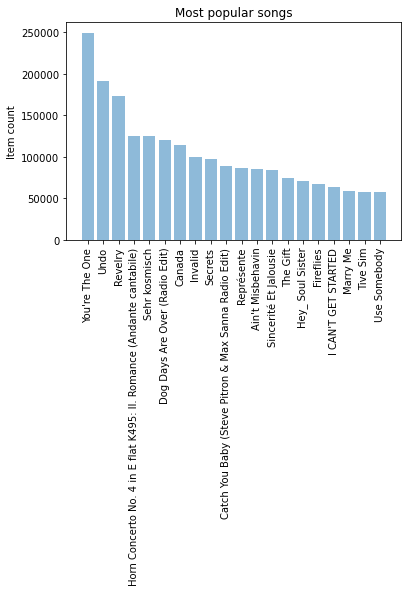

In [19]:
import matplotlib.pyplot as plt
#plt.rcdefaults()
import numpy as np
#mport matplotlib.pyplot as plt

popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
popular_songs_top_20 = popular_songs.sort_values('listen_count', ascending=False).head(n=20)
objects = (list(popular_songs_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_songs_top_20['listen_count'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular songs')
plt.show()

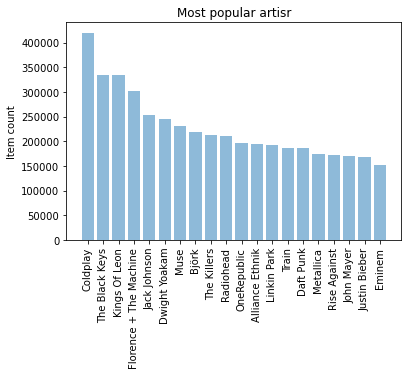

In [20]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values('listen_count', ascending=False).head(n=20)
objects_artist = (list(popular_artist_top_20['artist_name']))
y_pos_artist = np.arange(len(objects_artist))
performance_artist = list(popular_artist_top_20['listen_count'])

plt.bar(y_pos_artist, performance_artist, align='center', alpha=0.5)
plt.xticks(y_pos_artist, objects_artist, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular artisr')
plt.show()

In [21]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(by='title', ascending = False)
user_song_count_distribution.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

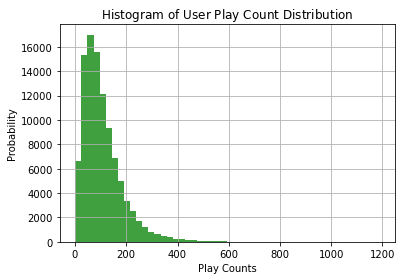

In [22]:
x = user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
plt.xlabel('Play Counts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $')
plt.grid(True)
plt.show()

## RECOMENDATION SYSTEM BASED ON POPULARITY

In [23]:
def create_popularity_recommendation(train_data, user_id, item_id):
    #Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    #Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    #Generate a recommendation rank based upon score
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    #Get the top 10 recommendations
    popularity_recommendations = train_data_sort.head(20)
    return popularity_recommendations

In [24]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','title')

In [25]:
recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


## RECOMEDATION SYSTEM BASES ON ITEM

In [26]:
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [27]:
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders


train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size =0.30, random_state=0)
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
#using the user id 7 to predict the recommended songs 
user_id = list(train_data.user)[7]
user_items = is_model.get_user_items(user_id)
is_model.recommend(user_id)

No. of unique songs for the user: 66
no. of unique songs in the training set: 4879
Non zero values in cooccurence_matrix :290327


,user_id,song,score,rank
0,a974fc428825ed071281302d6976f59bfa95fe7e,Put Your Head On My Shoulder (Album Version),0.026334,1
1,a974fc428825ed071281302d6976f59bfa95fe7e,The Strength To Go On,0.025176,2
2,a974fc428825ed071281302d6976f59bfa95fe7e,Come Fly With Me (Album Version),0.024447,3
3,a974fc428825ed071281302d6976f59bfa95fe7e,Moondance (Album Version),0.024118,4
4,a974fc428825ed071281302d6976f59bfa95fe7e,Kotov Syndrome,0.023311,5
5,a974fc428825ed071281302d6976f59bfa95fe7e,Use Somebody,0.023104,6
6,a974fc428825ed071281302d6976f59bfa95fe7e,Lucky (Album Version),0.022930,7
7,a974fc428825ed071281302d6976f59bfa95fe7e,Secrets,0.022889,8
8,a974fc428825ed071281302d6976f59bfa95fe7e,Clocks,0.022562,9
9,a974fc428825ed071281302d6976f59bfa95fe7e,Sway (Album Version),0.022359,10


## SVD Singular Value Decomposition(Matrix Factorisation)

In [28]:
triplet_dataset_sub_song_merged_sum_df = triplet_dataset_sub_song_merged[['user','listen_count']].groupby('user').sum().reset_index()
triplet_dataset_sub_song_merged_sum_df.rename(columns={'listen_count':'total_listen_count'},inplace=True)
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged,triplet_dataset_sub_song_merged_sum_df)
triplet_dataset_sub_song_merged['fractional_play_count'] = triplet_dataset_sub_song_merged['listen_count']/triplet_dataset_sub_song_merged['total_listen_count']

In [29]:
from scipy.sparse import coo_matrix
small_set = triplet_dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pd.merge(small_set,song_codes,how='left')
small_set = pd.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','fractional_play_count']]
data_array = mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values


data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)

In [30]:
user_codes[user_codes.user =='2a2f776cbac6df64d6cb505e7e834e01684673b6']


,user_index,user,us_index_value
27516,2981434,2a2f776cbac6df64d6cb505e7e834e01684673b6,27516


In [31]:
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [32]:

def compute_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

In [33]:

K=50
#Initialize a sample user rating matrix
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]
#Compute SVD of the input user ratings matrix
U, S, Vt = compute_svd(urm, K)

In [34]:
uTest = [27513]

#Get estimated rating for test user
print("Predicted ratings:")

Predicted ratings:


In [35]:

uTest_recommended_items = compute_estimated_matrix(urm, U, S, Vt, uTest, K, True)

for user in uTest:
    print("Recommendation for user with user id {}". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("The number {} recommended song is {} BY {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1

Recommendation for user with user id 27513
The number 1 recommended song is Master Of Puppets BY Metallica
The number 2 recommended song is Garden Of Eden BY Guns N' Roses
The number 3 recommended song is Bring Me To Life BY Evanescence
The number 4 recommended song is Kryptonite BY 3 Doors Down
The number 5 recommended song is Make Her Say BY Kid Cudi / Kanye West / Common
The number 6 recommended song is Night Village BY Deep Forest
The number 7 recommended song is Savior BY Rise Against
The number 8 recommended song is Good Things BY Rich Boy / Polow Da Don / Keri Hilson
The number 9 recommended song is Bleed It Out [Live At Milton Keynes] BY Linkin Park
The number 10 recommended song is Uprising BY Muse
